In [2]:
import numpy as np
import pandas as pd
import statistics
import scipy

from sklearn.datasets import load_boston, load_iris, load_diabetes, load_wine, load_breast_cancer, make_regression, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

# Probing the outcomes of different Train-Test Splits

## Functions

In [7]:
def trials(X, y, model_class, size, state):
    
    rmse = []
    output = []

    for i in state:
        rmse = []
        for j in size:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j, random_state=i)
            model = model_class()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse.append(rmse_model)
        output.append(rmse)
    return np.asarray(output)

In [8]:
def plot(results, size, minimum, maximum, single_state:int=42, save_img:bool=False):
    
    df = pd.DataFrame(results.T, columns = state)
    
    plt.plot(size, df[42])
    plt.plot(.2,df.iloc[19,single_state], 'or', c = 'black')
    plt.ylim(minimum, maximum)
    plt.xlabel("Test set proportion"); plt.ylabel("RMSE")
    plt.title('Figure 1')
    if save_img: plt.savefig('figure_1.png', bbox_inches="tight")
    plt.show()

    df.plot(legend = False); 
    plt.xlim(-3,101); plt.ylim(minimum, maximum)
    plt.xlabel("Test set proportion"); plt.ylabel("RMSE")
    plt.xticks([0,20,40,60,80,100], [0.0,0.2,0.4,0.6,0.8,1.0])
    plt.title('Figure 2')
    if save_img: plt.savefig('figure_2.png', bbox_inches="tight")
    plt.show()

    plt.plot(size, np.min(results, axis=0), label="Minimum")
    plt.plot(size, np.mean(results, axis=0), label="Mean")
    plt.plot(size, np.median(results, axis=0), label="Median")
    plt.plot(size, np.max(results, axis=0), label="Maximum")
    plt.ylim(minimum, maximum)
    plt.legend(loc="lower right")
    plt.xlabel("Test set proportion"); plt.ylabel("RMSE")
    plt.title('Figure 3')
    if save_img: plt.savefig('figure_3.png', bbox_inches="tight")
    plt.show()
        
    plt.scatter(np.mean(results, axis=0), np.std(results,axis=0), c=size, vmin=0, vmax=1)
    cba = plt.colorbar()
    plt.plot(np.mean(results, axis=0), np.std(results,axis=0), color="black", lw=1, zorder=-1)
    plt.xlim(4,8), plt.ylim(0,maximum-8)
    plt.xlabel("Mean (RMSE)"); plt.ylabel("Standard Deviation (RMSE)")
    plt.title("Figure 4")
    if save_img: plt.savefig('figure_4.png', bbox_inches="tight")
    plt.show()
    
    return None

In [401]:
X, y = load_boston(return_X_y=True) # Regression
# X, y = load_iris(return_X_y=True) # Classification
# X, y = load_diabetes(return_X_y=True) # Regression
# X, y = load_wine(return_X_y=True) # Classification
# X, y = load_breast_cancer(return_X_y=True) # Classification
# X, y = make_regression(n_samples=500, n_features=10, n_informative=10, noise=5, coef=False, random_state=0)

print(X.shape)

(506, 13)

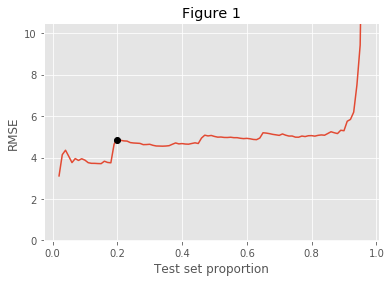

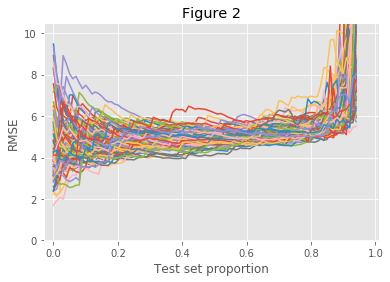

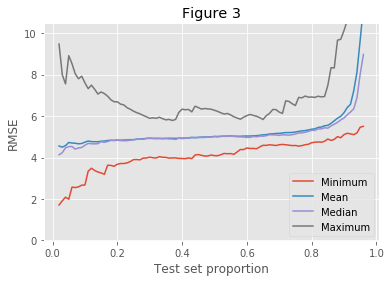

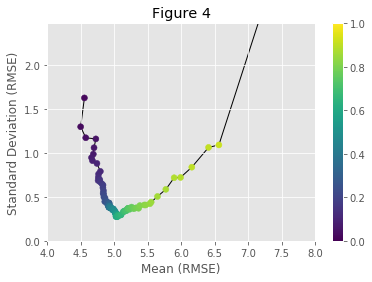

In [412]:
size = np.arange(0.02,.97,0.01)
state = np.arange(0,101,1)
results = trials(X, y, LinearRegression, size, state)

minimum = -0.02
maximum = np.mean(results)*2

plot(results, size, minimum=minimum, maximum=maximum, save_img=True)

# Factors impacting the reliability of Train-Test Split probing

In [3]:
def dataset_attribute_trials(variations, n_range, random_states=[0],
                             size=np.around(np.arange(0.02,.97,0.01),2), state=np.arange(0,101,1)):
    output = []
    print(f"| noise | n_features | n_informative | n_samples |{'='*len(random_states)}|")
    print(f"|-------|------------|---------------|-----------|{'-'*len(random_states)}|")
    for (i,j,k,l) in variations:
        print(f"| {i:>5.1f} | {j:>10} | {k:>13} | {l:>9} |", end="")
        random_state_results = []
        for r in random_states:
            X, y = make_regression(n_samples=l, 
                                    n_features=j, 
                                    n_informative=k, 
                                    noise=i, 
                                    coef=False, 
                                    random_state=r)
            results = trials(X, y, LinearRegression, size, state)
            random_state_results.append(results)
            print("=", end="")
        output.append(random_state_results)
        print("|")

    output = np.asarray(output)
    x = np.mean(np.mean(output[:,:,:,:], axis=2), axis=1)
    y = np.mean(np.std(output[:,:,:,:], axis=2), axis=1)
    
    mins = np.asarray([[x[i, np.argmin(y, axis=1)[i]] for i in range(len(x))],
                       [y[i, np.argmin(y, axis=1)[i]] for i in range(len(x))],
                       size[np.argmin(y, axis=1)]])
    
    return np.asarray([x, y]), mins

def variation(n_range, idx):
    noise = np.tile(5, len(n_range))
    n_features = np.tile(10, len(n_range))
    n_informative = np.tile(10, len(n_range))
    n_samples = np.tile(500, len(n_range))
    
    variations = np.vstack((noise, n_features, n_informative, n_samples))
    variations[idx,:] = n_range
    
    return variations.T

In [102]:
size = np.around(np.arange(0.02,.97,0.01),2)
state = np.arange(0,101,1)
cmap = plt.get_cmap("viridis")

## Noise

In [12]:
output_noise = outputs[0]
mins_noise = minimums[0]

In [103]:
n_range = np.round(np.linspace(1,10,8),1)
variations = variation(n_range, 0)
output_noise, mins_noise = dataset_attribute_trials(variations=variations, n_range=n_range, random_states=np.arange(20))

| noise | n_features | n_informative | n_samples |====================|
|-------|------------|---------------|-----------|--------------------|
|   1.0 |         10 |            10 |       500 |====================|
|   2.0 |         10 |            10 |       500 |====================|
|   3.0 |         10 |            10 |       500 |====================|
|   4.0 |         10 |            10 |       500 |====================|
|   6.0 |         10 |            10 |       500 |====================|
|   7.0 |         10 |            10 |       500 |====================|
|   8.0 |         10 |            10 |       500 |====================|
|  10.0 |         10 |            10 |       500 |====================|


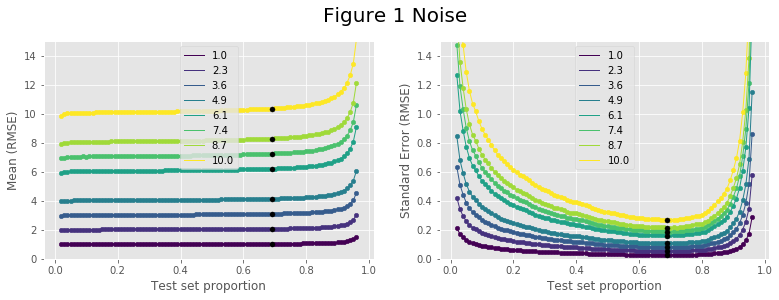

In [450]:
n_range = np.round(np.linspace(1,10,8),1)

plt.figure(figsize=(13,4))
for j in [0,1]:
    for i in range(len(n_range)):
        color = matplotlib.colors.to_hex(cmap((1*i)/(len(n_range)-1)))
        plt.subplot(1,2,j+1).plot(size, output_noise[j][i], lw=1, color=color, label=n_range[i])
        plt.subplot(1,2,j+1).scatter(size, output_noise[j][i], color=color, s=20)
        plt.subplot(1,2,j+1).scatter(mins_noise[2][i], mins_noise[j][i], color="black", s=25, zorder=10)
    plt.legend(loc="upper center")
    if j == 0: 
        plt.ylim(0, 15)
        plt.ylabel("Mean (RMSE)")
    else: 
        plt.ylim(0, 1.5)
        plt.ylabel("Standard Error (RMSE)")
    plt.xlabel("Test set proportion")
    title = "Figure 1 Noise"; plt.suptitle(title, y=1, fontsize=20)
plt.savefig(title+".png", bbox_inches="tight")
plt.show()

## Features

In [25]:
output_features = outputs[1]
mins_features = minimums[1]

In [104]:
n_range = np.round(np.linspace(1,100,8),0).astype(int)
variations = variation(n_range, [1,2])
output_features, mins_features = dataset_attribute_trials(variations=variations, n_range=n_range, random_states=np.arange(20))

| noise | n_features | n_informative | n_samples |====================|
|-------|------------|---------------|-----------|--------------------|
|   5.0 |          1 |             1 |       500 |====================|
|   5.0 |         15 |            15 |       500 |====================|
|   5.0 |         29 |            29 |       500 |====================|
|   5.0 |         43 |            43 |       500 |====================|
|   5.0 |         58 |            58 |       500 |====================|
|   5.0 |         72 |            72 |       500 |====================|
|   5.0 |         86 |            86 |       500 |====================|
|   5.0 |        100 |           100 |       500 |====================|


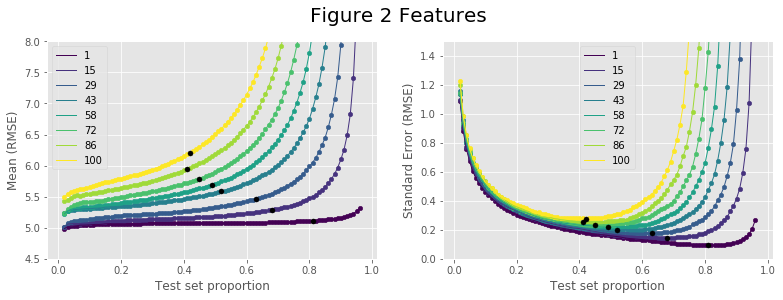

In [449]:
n_range = np.round(np.linspace(1,100,8),0).astype(int)

plt.figure(figsize=(13,4))
for j in [0,1]:
    for i in range(len(n_range)):
        color = matplotlib.colors.to_hex(cmap((1*i)/(len(n_range)-1)))
        plt.subplot(1,2,j+1).plot(size, output_features[j][i], lw=1, color=color, label=n_range[i])
        plt.subplot(1,2,j+1).scatter(size, output_features[j][i], color=color, s=20)
        plt.subplot(1,2,j+1).scatter(mins_features[2][i], mins_features[j][i], color="black", s=25, zorder=10)
    plt.legend()
    if j == 0: 
        plt.ylim(4.5, 8)
        plt.ylabel("Mean (RMSE)")
    else: 
        plt.ylim(0, 1.5)
        plt.ylabel("Standard Error (RMSE)")
    plt.xlabel("Test set proportion")
    title = "Figure 2 Features"; plt.suptitle(title, y=1, fontsize=20)
plt.savefig(title+".png", bbox_inches="tight")
plt.show()

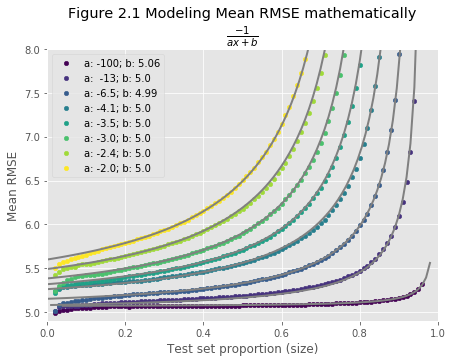

In [396]:
a = [-100, -13 , -6.5,-4.10, -3.5, -3.00, -2.4, -2.0]
b = [5.06, 5.00, 4.99, 5.00, 5.00, 5.00, 5.00, 5.00]
c = [1.00, 0.97, 0.955, 0.935, 0.9, 0.87, 0.85, 0.835]

plt.figure(figsize=(7,5))
for i in range(8):
    color = matplotlib.colors.to_hex(cmap((1*i)/(len(n_range)-1)))
    plt.plot(-1*size+c[i], -1/(a[i]*size)+b[i], color="grey", lw=2)
    plt.scatter(size, output_features[0][i], color=color, s=20, label=f"a: {a[i]:>4}; b: {b[i]}")
plt.title(r"""Figure 2.1 Modeling Mean RMSE mathematically
$\frac{-1}{ax+b}$""")
plt.text(0.07,6.4,"")
plt.ylim(4.9, 8); plt.ylabel("Mean RMSE")
plt.xlim(0,1); plt.xlabel("Test set proportion (size)")
plt.legend()
plt.savefig("Figure 2_1.png", bbox_inches="tight")
plt.show()

## Informative Features

In [ ]:
output_informative = outputs[2]
mins_informative = minimums[2]

In [105]:
n_range = np.round(np.linspace(1,100,8),0).astype(int)
variations = variation(n_range, 2); variations[:,1] = np.tile(100, len(n_range))
output_informative, mins_informative = dataset_attribute_trials(variations=variations, n_range=n_range, random_states=np.arange(20))

| noise | n_features | n_informative | n_samples |====================|
|-------|------------|---------------|-----------|--------------------|
|   5.0 |        100 |             1 |       500 |====================|
|   5.0 |        100 |            15 |       500 |====================|
|   5.0 |        100 |            29 |       500 |====================|
|   5.0 |        100 |            43 |       500 |====================|
|   5.0 |        100 |            58 |       500 |====================|
|   5.0 |        100 |            72 |       500 |====================|
|   5.0 |        100 |            86 |       500 |====================|
|   5.0 |        100 |           100 |       500 |====================|


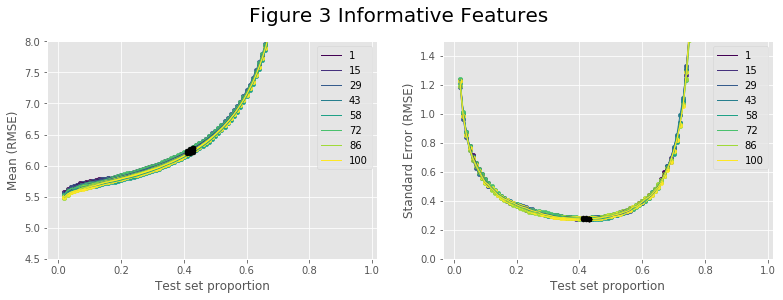

In [448]:
n_range = np.round(np.linspace(1,100,8),0).astype(int)

plt.figure(figsize=(13,4))
for j in [0,1]:
    for i in range(len(n_range)):
        color = matplotlib.colors.to_hex(cmap((1*i)/(len(n_range)-1)))
        plt.subplot(1,2,j+1).plot(size, output_informative[j][i], lw=1, color=color, label=n_range[i])
        plt.subplot(1,2,j+1).scatter(size, output_informative[j][i], color=color, s=20)
        plt.subplot(1,2,j+1).scatter(mins_informative[2][i], mins_informative[j][i], color="black", s=25, zorder=10)
    plt.legend()
    if j == 0: 
        plt.ylim(4.5, 8)
        plt.ylabel("Mean (RMSE)")
    else: 
        plt.ylim(0, 1.5)
        plt.ylabel("Standard Error (RMSE)")
    plt.xlabel("Test set proportion")
    title = "Figure 3 Informative Features"; plt.suptitle(title, y=1, fontsize=20)
plt.savefig(title+".png", bbox_inches="tight")
plt.show()

## Sample size

In [118]:
output_sample_size = outputs[3]
mins_sample_size = minimums[3]

In [106]:
n_range = np.round(np.linspace(100,10000,8),-1).astype(int)
variations = variation(n_range, 3)
output_sample_size, mins_sample_size = dataset_attribute_trials(variations=variations, n_range=n_range, random_states=np.arange(20))

| noise | n_features | n_informative | n_samples |====================|
|-------|------------|---------------|-----------|--------------------|
|   5.0 |         10 |            10 |       100 |====================|
|   5.0 |         10 |            10 |      1510 |====================|
|   5.0 |         10 |            10 |      2930 |====================|
|   5.0 |         10 |            10 |      4340 |====================|
|   5.0 |         10 |            10 |      5760 |====================|
|   5.0 |         10 |            10 |      7170 |====================|
|   5.0 |         10 |            10 |      8590 |====================|
|   5.0 |         10 |            10 |     10000 |====================|


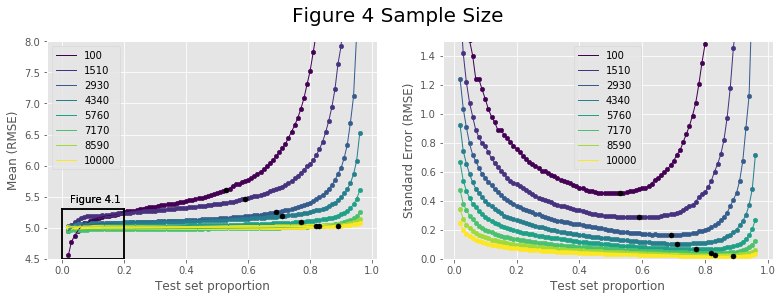

In [571]:
n_range = np.round(np.linspace(100,10000,8),-1).astype(int)

plt.figure(figsize=(13,4))
for j in [0,1]:
    for i in range(len(n_range)):
        color = matplotlib.colors.to_hex(cmap((1*i)/(len(n_range)-1)))
        plt.subplot(1,2,j+1).plot(size, output_sample_size[j][i], lw=1, color=color, label=n_range[i])
        plt.subplot(1,2,j+1).scatter(size, output_sample_size[j][i], color=color, s=20)
        plt.subplot(1,2,j+1).scatter(mins_sample_size[2][i], mins_sample_size[j][i], color="black", s=25, zorder=10)
    plt.legend()
    if j == 0: 
        plt.ylim(4.5, 8)
        plt.ylabel("Mean (RMSE)")
    else: 
        plt.ylim(0, 1.5)
        plt.ylabel("Standard Error (RMSE)")
    plt.xlabel("Test set proportion")
    title = "Figure 4 Sample Size"; plt.suptitle(title, y=1, fontsize=20)
    plt.subplot(1,2,1).plot([0,0],[4.5,5.3],color="black")
    plt.subplot(1,2,1).plot([0.2,0.2],[4.5,5.3],color="black")
    plt.subplot(1,2,1).plot([0,0.2],[4.5,4.5],color="black")
    plt.subplot(1,2,1).plot([0,0.2],[5.3,5.3],color="black")
    plt.subplot(1,2,1).annotate("Figure 4.1", (0.025,5.4))
plt.savefig(title+".png", bbox_inches="tight")
plt.show()

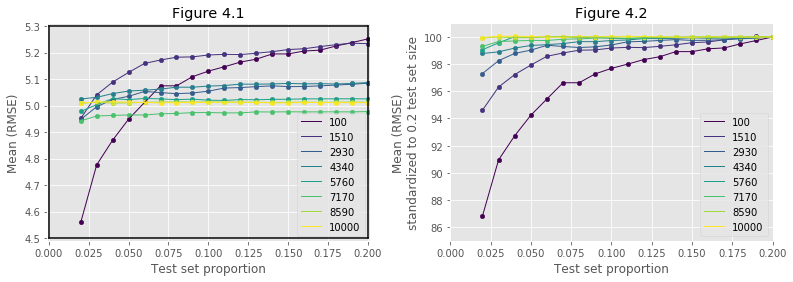

In [573]:
plt.figure(figsize=(13,4))
for i in range(len(n_range)):
    color = matplotlib.colors.to_hex(cmap((1*i)/(len(n_range)-1)))
    plt.subplot(1,2,1).plot(size, output_sample_size[0][i], lw=1, color=color, label=n_range[i])
    plt.subplot(1,2,1).scatter(size, output_sample_size[0][i], color=color, s=20)
plt.subplot(1,2,1).plot([0,0],[4.5,5.3],color="black")
plt.subplot(1,2,1).plot([0.2,0.2],[4.5,5.3],color="black")
plt.subplot(1,2,1).plot([0,0.2],[4.5,4.5],color="black")
plt.subplot(1,2,1).plot([0,0.2],[5.3,5.3],color="black")
plt.legend(loc="lower right")
plt.ylim(4.49, 5.31)
plt.xlim(-0.001, 0.201)
plt.ylabel("Mean (RMSE)")
plt.xlabel("Test set proportion")
plt.title("Figure 4.1")
    
for i in range(len(n_range)):
    color = matplotlib.colors.to_hex(cmap((1*i)/(len(n_range)-1)))
    plt.subplot(1,2,2).plot(size, output_sample_size[0][i]*100/output_sample_size[0][i][18], lw=1, color=color, label=n_range[i])
    plt.subplot(1,2,2).scatter(size, output_sample_size[0][i]*100/output_sample_size[0][i][18], color=color, s=20)
plt.legend(loc="lower right")
plt.ylim(85, 101)
plt.xlim(0, 0.2)
plt.ylabel("Mean (RMSE)\nstandardized to 0.2 test set size")
plt.xlabel("Test set proportion")
plt.title("Figure 4.2")
plt.subplots_adjust(wspace=0.25)
plt.savefig("Figures 4_1 and 4_2.png", bbox_inches="tight")

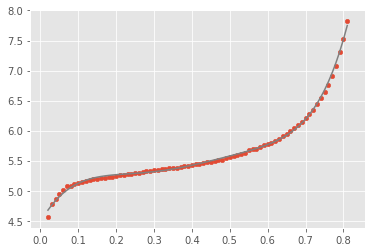

In [446]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x = size[:80]
y = output_sample_size[0][0][:80]
order = 7

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=20, zorder=1)

X = np.array([x**i for i in range(order)]).T
X_test = np.array([x**i for i in range(order)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x, regr.predict(X_test), color="grey", zorder=2)
plt.show()

## Source used: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_polynomial_regression.html

## Saving Outputs

In [117]:
# outputs = np.asarray([output_noise, output_features, output_informative, output_sample_size]); print(outputs.shape)
# minimums = np.asarray([mins_noise, mins_features, mins_informative, mins_sample_size]); print(minimums.shape)

# np.save("train-test split outputs linear", outputs)
# np.save("train-test split minimums linear", minimums)

outputs = np.load("train-test split outputs.npy")
minimums = np.load("train-test split minimums.npy")

outputs_linear = np.load("train-test split outputs linear.npy")
minimums_linear = np.load("train-test split minimums linear.npy")